In [1]:
# Import the relevant modules
import iris
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import iris.quickplot as qplt
import iris.plot as iplt
import datetime
import shutil
from six.moves import urllib
from pathlib import Path
from math import pi
import trackpy
from iris.time import PartialDateTime
import tobac
import warnings

In [2]:
# Import the libraries
import functions
import dictionaries

In [3]:
# Set up the warning messages
warnings.filterwarnings('ignore', category=UserWarning, append=True)
warnings.filterwarnings('ignore', category=RuntimeWarning, append=True)
warnings.filterwarnings('ignore', category=FutureWarning, append=True)
warnings.filterwarnings('ignore', category=pd.io.pytables.PerformanceWarning)

In [4]:
# Load the olr and precip data
olr, time_olr, datetimes_olr, con_olr = functions.load_olr_data(dictionaries.data_file)

# Load the precip data
precip, time_precip, datetimes_precip, con_precip = functions.load_precip_data(dictionaries.precip)

In [5]:
# Set up the directory to save the data
savedir, plot_dir = functions.setup_directories()

In [6]:
# Extract longitude and latitude
longitude,latitude=np.meshgrid(olr.coord('longitude').points,olr.coord('latitude').points)

# Calculate dxy
dxy, dt = functions.calculate_dxy(longitude, latitude, olr)

In [7]:
#sigma = dictionaries.sigma

#tf = (olr.data/sigma)**(0.25)
#tb_var = (-dictionaries.a + np.sqrt(dictionaries.a**2 + 4*dictionaries.b*tf.data))/(2*dictionaries.b)

In [8]:
# Calculate brightness temperatures
tf, tb_var, tb = functions.calculate_temperatures(dictionaries.a, dictionaries.b, dictionaries.sigma, olr)

In [9]:
# Set up the parameters dictionaries
# features parameters
parameters_features = functions.setup_parameters_features(dictionaries.position_threshold, dictionaries.sigma_threshold, dictionaries.target, dictionaries.threshold, dictionaries.n_min_threshold)

# segmentation parameters
parameters_segmentation = functions.setup_parameters_segmentation(dictionaries.target, dictionaries.method, dictionaries.threshold)

# linking parameters
parameters_linking = functions.setup_parameters_linking(dictionaries.n_min_threshold, dictionaries.stubs, dictionaries.order, dictionaries.extrapolate, dictionaries.memory, dictionaries.adaptive_stop, dictionaries.adaptive_step, dictionaries.subnetwork_size, dictionaries.method_linking)

In [10]:
# Now perform the sensitivity analysis
print("Values of nminthreshold to be tested: ", dictionaries.n_min_threshold_values)
n_min_threshold_values=dictionaries.n_min_threshold_values

# Call the sensitivity analysis function
functions.perform_sensitivity_analysis(tb, savedir, parameters_features, parameters_segmentation, parameters_linking, n_min_threshold_values)

Frame 743: 14 trajectories present.
[22.89826502 13.48330654 12.18784826 23.56243245  8.48014162 11.62624686
  6.1031129   7.27247802 10.72523622 21.88009196 10.12518996 15.6603464
 11.14413589  8.58561115  6.08551146 13.37353298 13.15189762  8.14488071
 18.45518523  7.23418406 16.05451601 10.41439052  8.306597   18.69689628
 10.30500523  7.0382939   4.16097528 19.69538169 12.76297227  8.01284299
 13.70682783  8.34732393 16.18993004  9.74839325 12.44540763  9.82742135
  8.31153025 15.35180955 16.36662753 14.62988363 17.96318203 14.21273934
 15.36704123 30.58016849  4.90697233 15.16360722 12.11083592  7.97708901
 18.53070526 16.8856503   5.26058254 16.22449587 27.40405513 24.80861529
  6.60780377 13.08896162 13.16696548 13.30543314 10.16286843 10.17307859
 17.13899511 12.93166526 22.25951626 20.43376406  6.4322375  17.46581552
 12.07132746  9.10923935 16.24158079 16.30484072  9.63451259  4.04697627
 25.900257   19.61617682 13.43597588 13.78151848  5.8908773  19.96963291
 14.81846327 17.

,num_features,mean_area,max_area,min_area,num_tracks,mean_lifetime,max_lifetime,min_lifetime,mean_velocity,max_velocity,min_velocity,n_min_threshold
0,50486,53145.053126,1.705501e+06,2862.613636,1967,10.060498,73.0,6.0,14.016506,77.504780,1.231650,118
1,13158,157561.325363,1.705501e+06,23301.964286,544,11.343750,67.0,6.0,13.161695,37.621377,2.166528,987
2,10035,192410.296622,1.705501e+06,34242.750000,435,11.526437,66.0,6.0,13.570030,37.621377,2.819971,1481
3,9743,197119.170124,1.705501e+06,34699.821429,421,11.600950,66.0,6.0,13.595243,37.621377,2.819971,1550
4,8302,216090.281712,1.705501e+06,47619.000000,374,11.585561,66.0,6.0,13.586032,37.621377,2.844890,1975
5,7056,250057.640684,1.705501e+06,59848.875000,309,11.925566,66.0,6.0,13.724940,37.621377,1.961036,2469


In [11]:
df = pd.read_csv('Save/Jan_1998/n_min_threshold/sensitivity_analysis_nminthreshold.csv')

In [12]:
df

,num_features,mean_area,max_area,min_area,num_tracks,mean_lifetime,max_lifetime,min_lifetime,mean_velocity,max_velocity,min_velocity,n_min_threshold
0,50486,53145.053126,1.705501e+06,2862.613636,1967,10.060498,73.0,6.0,14.016506,77.504780,1.231650,118
1,13158,157561.325363,1.705501e+06,23301.964286,544,11.343750,67.0,6.0,13.161695,37.621377,2.166528,987
2,10035,192410.296622,1.705501e+06,34242.750000,435,11.526437,66.0,6.0,13.570030,37.621377,2.819971,1481
3,9743,197119.170124,1.705501e+06,34699.821429,421,11.600950,66.0,6.0,13.595243,37.621377,2.819971,1550
4,8302,216090.281712,1.705501e+06,47619.000000,374,11.585561,66.0,6.0,13.586032,37.621377,2.844890,1975
5,7056,250057.640684,1.705501e+06,59848.875000,309,11.925566,66.0,6.0,13.724940,37.621377,1.961036,2469


In [13]:
# #plot of single Tb sensitivity analysis for MCSs
# import seaborn as sns 
# sns.set(font_scale=1.2)

# plt.figure(figsize=(24,14))
# f= 20
# lf= 15

# xticks=[225,230,235,240,245]
# ax1=plt.subplot(2,3,(1,4))
# ax1.set_title('a) Total track number ', loc='left', fontsize= f )
# ax1.plot(df['threshold'],df['num_tracks'],linewidth=3)
# ax1.set_xticks(xticks)
# ax1.set_ylabel('no. MCS tracks (01-01-1998 - 31-01-1998)')
# ax1.set_xlabel('brightness temperature (K)')

# ax2=plt.subplot(2,3,2)
# ax2.set_title('b) Detected features ', loc='left', fontsize= f )
# ax2.plot(df['threshold'],df['num_features'],linewidth=3)
# ax2.set_xticks(xticks)
# ax2.set_ylabel('no. detected features (01-01-1998 - 31-01-1998)')
# ax2.set_xlabel('brightness temperature (K)')

# ax3=plt.subplot(2,3,3)
# ax3.set_title('c) Area ', loc='left', fontsize= f )
# ax3.plot(df['threshold'],df['mean_area'],linewidth=3)
# ax3.set_xticks(xticks)
# ax3.set_ylabel('mean MCS area (km$^{2}$)')
# ax3.set_xlabel('brightness temperature (K)')

# ax4=plt.subplot(2,3,5)
# ax4.set_title('d) Lifetime ', loc='left', fontsize= f )
# ax4.plot(df['threshold'],df['mean_lifetime'],linewidth=3)
# ax4.set_xticks(xticks)
# ax4.set_ylabel('mean MCS lifetime (hrs)')
# ax4.set_xlabel('brightness temperature (K)')

# ax5=plt.subplot(2,3,6)
# ax5.set_title('d) Velocity ', loc='left', fontsize= f )
# ax5.plot(df['threshold'],df['mean_velocity'],linewidth=3)
# ax5.set_xticks(xticks)
# ax5.set_ylabel('mean MCS velocity (m s$^{-1}$)')
# ax5.set_xlabel('brightness temperature (K)')

# plt.savefig('Plot/Jan_1998/singleTb/single_tb_analysis.png')


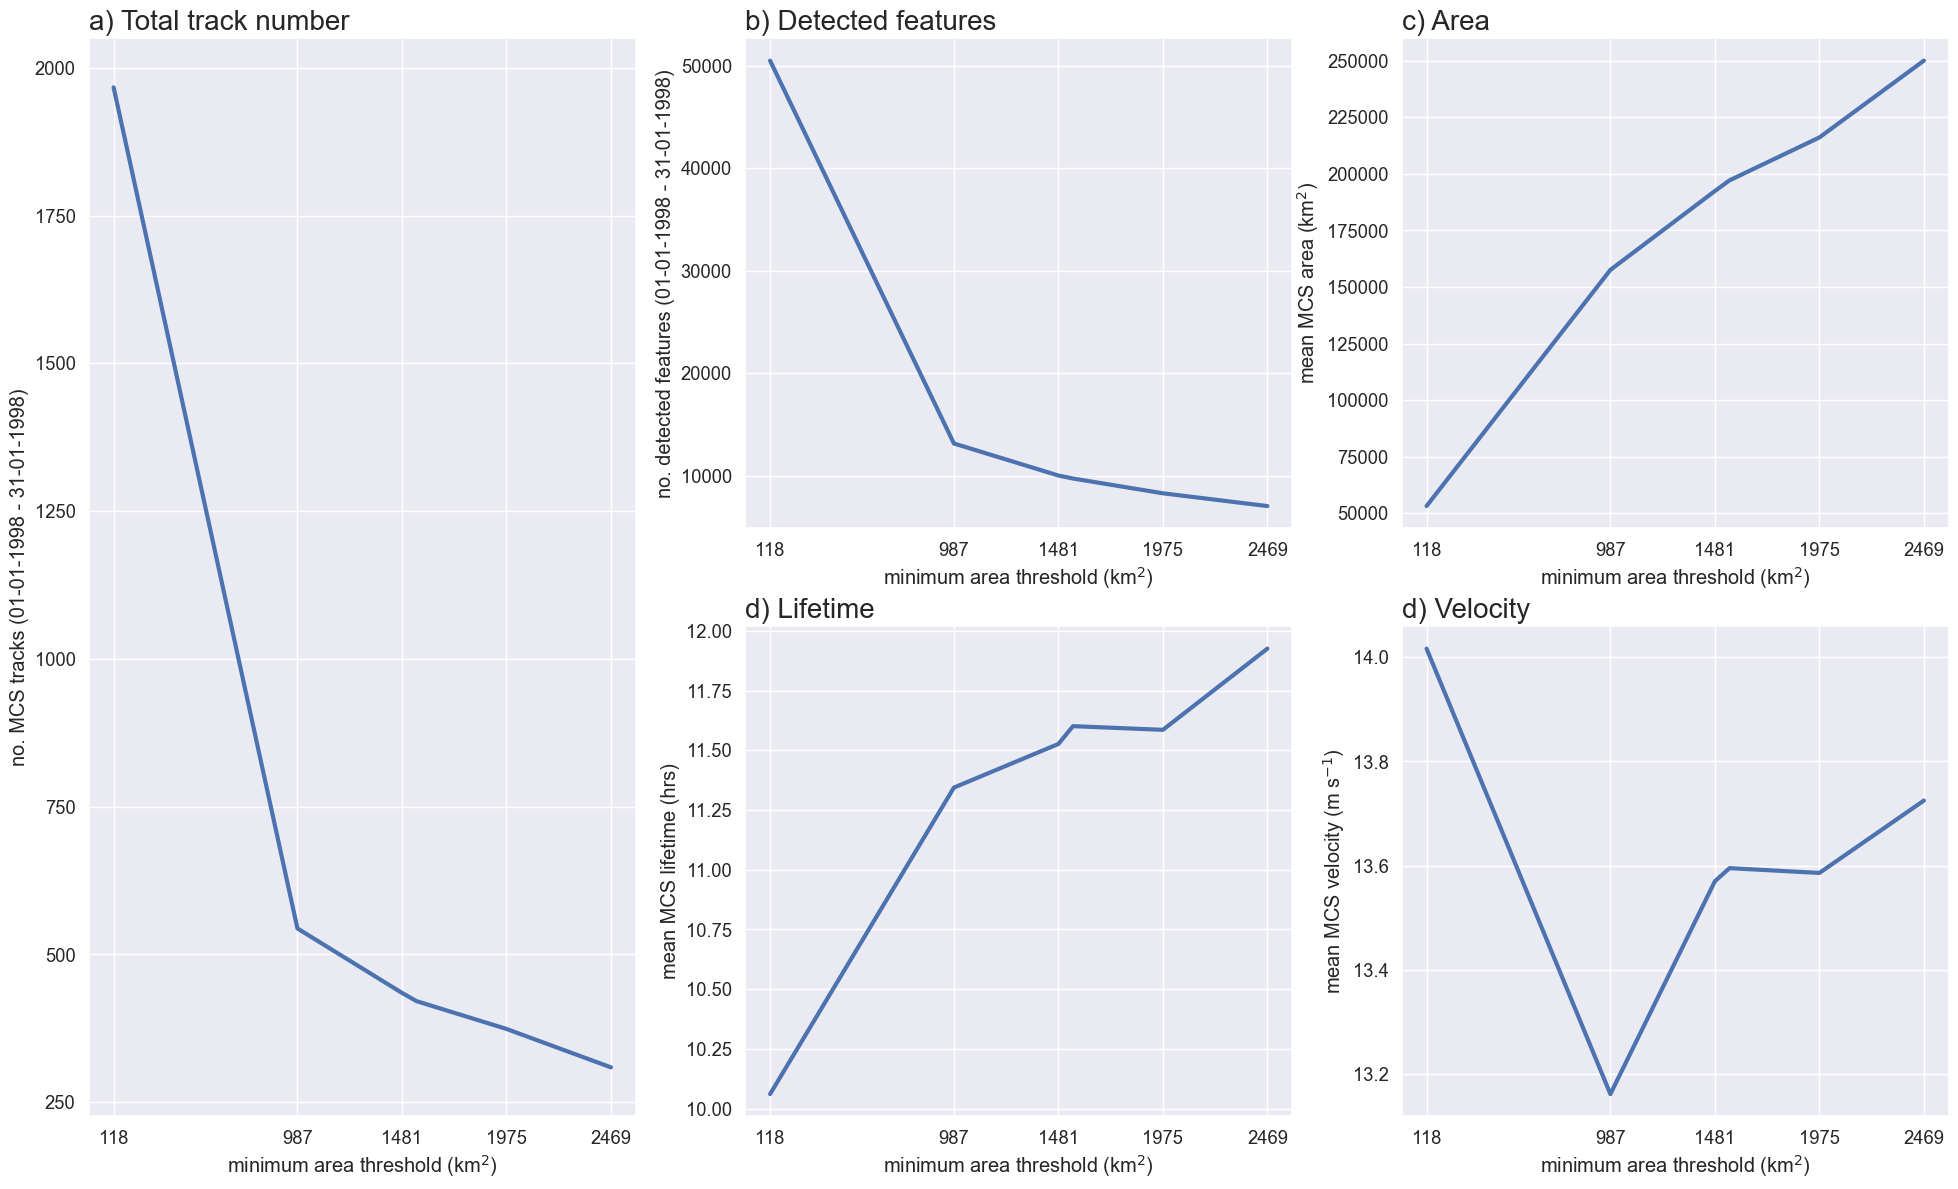

In [14]:
#plot of nminthreshold sensitivity analysis for MCSs
import seaborn as sns 
sns.set(font_scale=1.2)

plt.figure(figsize=(24,14))
f= 20
lf= 15

xticks=[118,987,1481,1975,2469]
ax1=plt.subplot(2,3,(1,4))
ax1.set_title('a) Total track number ', loc='left', fontsize= f )
ax1.plot(df['n_min_threshold'],df['num_tracks'],linewidth=3)
ax1.set_xticks(xticks)
ax1.set_ylabel('no. MCS tracks (01-01-1998 - 31-01-1998)')
ax1.set_xlabel('minimum area threshold (km$^{2}$)')

ax2=plt.subplot(2,3,2)
ax2.set_title('b) Detected features ', loc='left', fontsize= f )
ax2.plot(df['n_min_threshold'],df['num_features'],linewidth=3)
ax2.set_xticks(xticks)
ax2.set_ylabel('no. detected features (01-01-1998 - 31-01-1998)')
ax2.set_xlabel('minimum area threshold (km$^{2}$)')

ax3=plt.subplot(2,3,3)
ax3.set_title('c) Area ', loc='left', fontsize= f )
ax3.plot(df['n_min_threshold'],df['mean_area'],linewidth=3)
ax3.set_xticks(xticks)
ax3.set_ylabel('mean MCS area (km$^{2}$)')
ax3.set_xlabel('minimum area threshold (km$^{2}$)')

ax4=plt.subplot(2,3,5)
ax4.set_title('d) Lifetime ', loc='left', fontsize= f )
ax4.plot(df['n_min_threshold'],df['mean_lifetime'],linewidth=3)
ax4.set_xticks(xticks)
ax4.set_ylabel('mean MCS lifetime (hrs)')
ax4.set_xlabel('minimum area threshold (km$^{2}$)')

ax5=plt.subplot(2,3,6)
ax5.set_title('d) Velocity ', loc='left', fontsize= f )
ax5.plot(df['n_min_threshold'],df['mean_velocity'],linewidth=3)
ax5.set_xticks(xticks)
ax5.set_ylabel('mean MCS velocity (m s$^{-1}$)')
ax5.set_xlabel('minimum area threshold (km$^{2}$)')

plt.savefig('Plot/Jan_1998/nminthreshold/nminthreshold_analysis.png')
